In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data

data = pd.read_csv('winequality_red.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


1. fixed acidity : most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2. volatile acidity : the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. citric acid : found in small quantities, citric acid can add 'freshness' and flavor to wines
4. residual sugar : the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
5. chlorides : the amount of salt in the wine
6. free sulfur dioxide : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7. total sulfur dioxide : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8. density : the density of water is close to that of water depending on the percent alcohol and sugar content
9. pH : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
10. sulphates : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
11. alcohol : the percent alcohol content of the wine
12. quality : output variable (based on sensory data, score between 0 and 10)

In [4]:
data.isnull().sum() # check for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# rename columns to avoid spaces
data.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)

In [6]:
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
# dataset info and basic statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- All the features present is in the dataset is numerical.
- No Categorical Features present in the dataset.

In [8]:
data.describe() # describe the data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- The minimum wine quality is 3 and the maximum wine quality is 8.
- The average alchol a red wine holds according to the data is 10.4.
- There a huge difference between average total sulfur dioxide and maximum total sulfur dioxide.

In [9]:
data.shape 

(1599, 12)

- There are total 1599 Records/Rows in the dataset.
- There are total 12 Features/columns in the dataset.

In [10]:
print("Total Duplicate Records present is :",data[data.duplicated()==True].shape[0])

Total Duplicate Records present is : 240


- The output is 240 which indicates that there is total 240 Duplicate Records.
- Duplicate vlaues can lead to Data Integrity issues so it's better to drop these records.

In [11]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=data['quality'],name='Fixed Acidity'))
fig.update_layout(title='Quality of wine',xaxis_title='Quality',yaxis_title='Count')
fig.show()

- Total quality score is ranging from 0 to 10.
- Most of the wines are having quality of 5 or 6.
- We can clearly observe a class-imbalance in the target feature.

In [12]:
data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


> Correlation tells us the relationship between two variables( here - sign  indicate the negative correlation and + sign indicate the positive correlation).  Correlation Coefficient is calculated by dividing the Covariance of x,y by the Standard deviation of x and y.

ρ (X,Y) = cov (X,Y) / σX.σY. Here, cov is the covariance. σX is the standard deviation of X, and σY is the standard deviation of Y

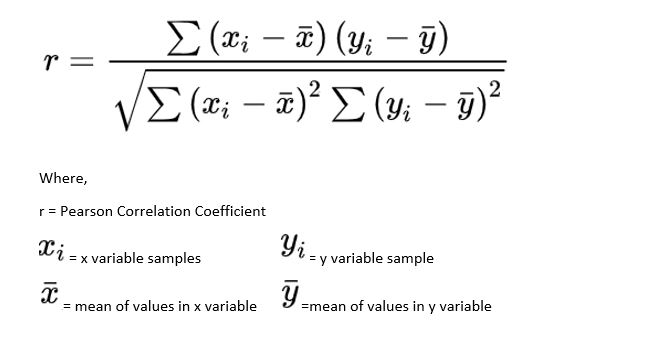

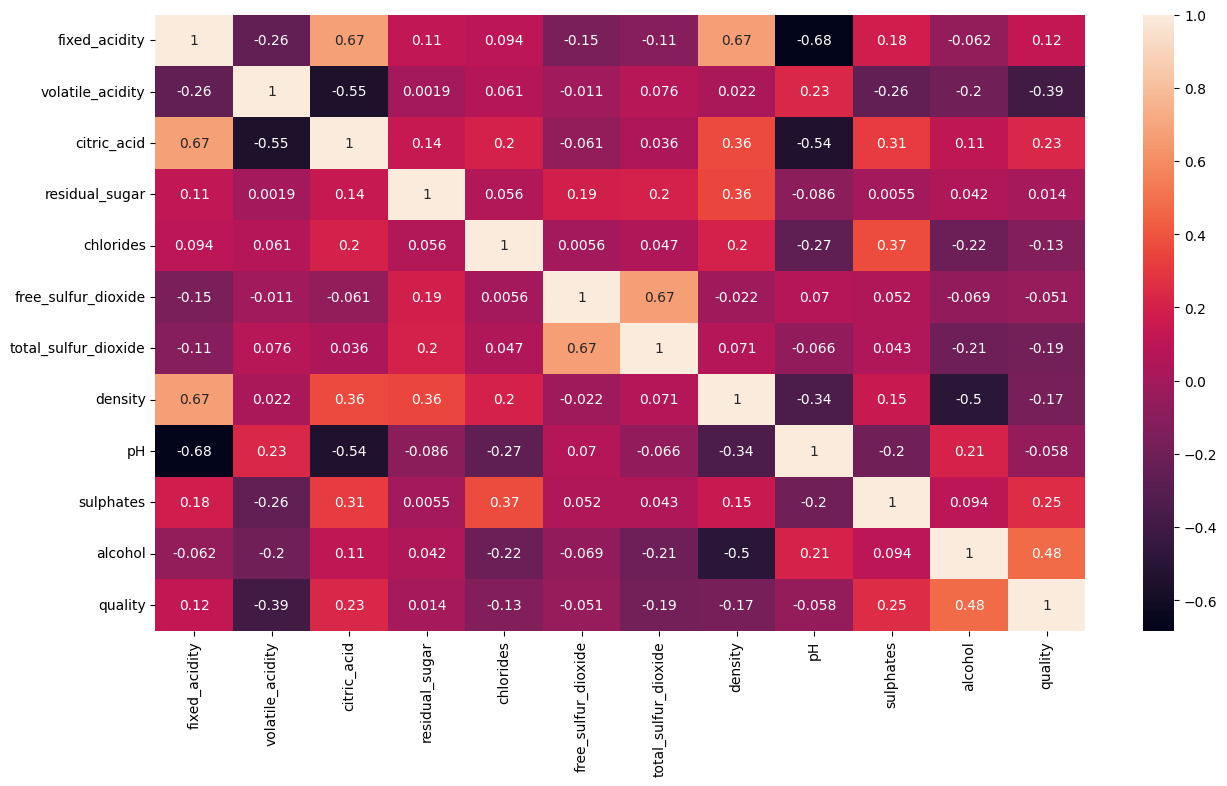

In [13]:
fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(data.corr(),annot=True);

- Many features are having high correlation with the other features:-
    - Fixed Acidity is having high correlation with citic acid and Density and vice-versa.
      - The attribute pair `fixed_acidity` and `citric_acid` exhibits a strong positive correlation of approximately 0.672.
    - Volatile Acidity is having lowest correlation with citic acid and vice-versa.
      - `pH` and `fixed_acidity` have a significant negative correlation of approximately -0.683.
      - `volatile_acidity` and `quality` display a strong negative correlation of around -0.391.
    - `Free Sulfur Dioxide` is having high correlation with `total sulfur dioxide`, `pH`, `Sulphates` and vice-versa.
    - Density is having high correaltion with fixed acidity, alcohol and vice-versa.
      - Similarly, `density` and `fixed_acidity` have a strong positive correlation of around 0.668.

- We can't drop these correlted features because these features helps algorithms to create pattern for prediction

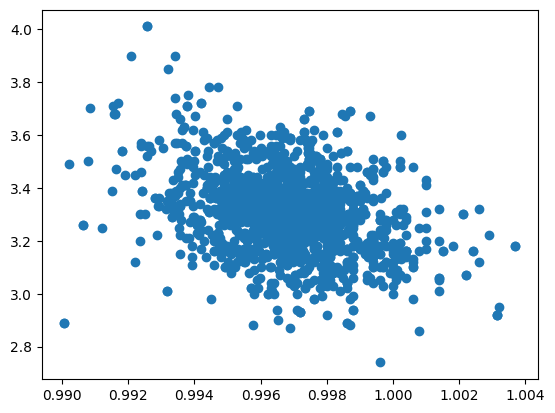

In [14]:
plt.scatter(x=data['density'],y=data['pH'],cmap='alpha');

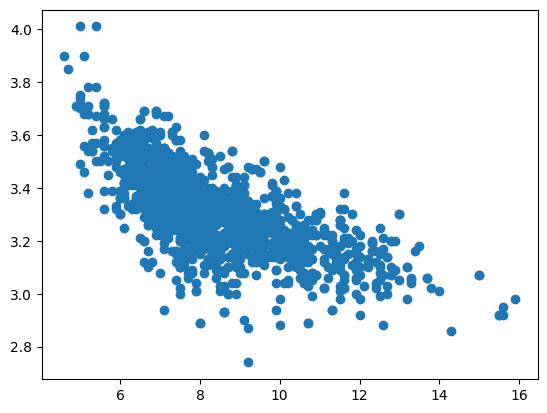

In [15]:
plt.scatter(x=data['fixed_acidity'],y=data['pH'],cmap='alpha');

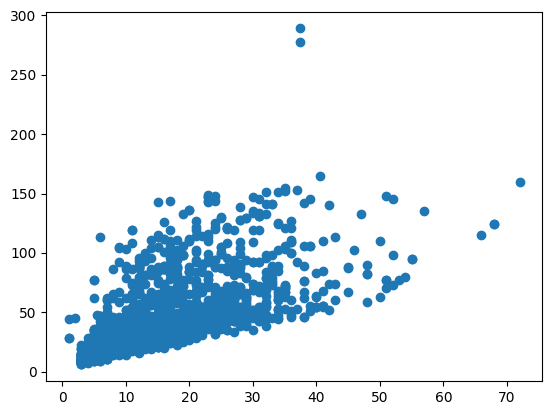

In [16]:
plt.scatter(x=data['free_sulfur_dioxide'],y=data['total_sulfur_dioxide'],cmap='alpha');

> skewness tells us the direction and the extent of skewness. In symmetrical distribution the mean, median, and mode are identical. <br>
> Skewness = 3(Mean - Median) / Standard Deviation

In [17]:
skew_df = data[data.columns].skew().to_frame().rename(columns={0:"Skewness"})
skew_df[:-1]

,Skewness
fixed_acidity,0.982751
volatile_acidity,0.671593
citric_acid,0.318337
residual_sugar,4.540655
chlorides,5.680347
free_sulfur_dioxide,1.250567
total_sulfur_dioxide,1.515531
density,0.071288
pH,0.193683
sulphates,2.428672


- Except Density, pH, citric acid all the other features are having high skewness.
- Skewness can lead to several implications like model performance, hypothesis testing and it returns biased estimation.
- So we will use tranformation techniques to transform these feature to have a symmetric distribution.

> Variance Inflation Factor (VIF) is a measure used to assess multicollinearity among predictor variables in regression analysis. It quantifies how much the variance of the estimated regression coefficient is increased due to multicollinearity.

VIF helps us measure how much the variance (or uncertainty) of the estimated effect of one column increases because of the presence of correlation with other columns. If the VIF value is high, it means that there's a strong correlation between the columns, and it might be difficult to distinguish their individual effects.

VIF is calculated for each predictor variable by regressing it against all other predictor variables. The formula for the VIF of a variable 'X' is:
VIF(X) = 1 / (1 - R²)
    i indicates the independent variable <br>
    R-squared value indicating the percentage of the variance

- VIF values are typically assessed to identify multicollinearity, where high VIF values indicate high correlation between predictor variables.
- High VIF values (usually above 10) are often considered indicative of significant multicollinearity.
- Multicollinearity can lead to unstable regression coefficients, difficulty in interpretation, and inflated standard errors.
- It's important to address multicollinearity to ensure the reliability of regression results.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = data.columns

vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
vif_data[:-1]

,feature,VIF
0,fixed_acidity,74.455312
1,volatile_acidity,17.960867
2,citric_acid,9.192549
3,residual_sugar,4.664003
4,chlorides,6.641291
5,free_sulfur_dioxide,6.460603
6,total_sulfur_dioxide,6.605274
7,density,1528.154302
8,pH,1078.171089
9,sulphates,22.462103


- `fixed_acidity`, `density`, `pH`, and `alcohol` exhibit extremely high VIF values. This suggests strong multicollinearity among these variables.
- `volatile_acidity`, `citric_acid`, `sulphates` also show moderately high VIF values, indicating potential collinearity.

> Box plots are a powerful visualization tool that provide insights into the distribution of data and the presence of outliers. An outlier is a data point that lies significantly outside the overall pattern of the data. Box plots help us visualize the spread and central tendency of the data, making it easier to identify potential outliers.

In [19]:
boxplot_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

for cols in boxplot_cols:
    plt.figure(figsize=(10,8))
    tx =px.data.tips()
    fig5 = px.box(data,y=cols);
    fig5.show();

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

**Key Points about Box Plots with Outliers:**

- **Fixed Acidity:**
  - The box plot for `fixed acidity` shows a few points located above the upper whisker, indicating potential outliers with higher fixed acidity values.
  - These outliers suggest the presence of certain wines with an unusually high fixed acidity level.
  - Further analysis could explore whether these outliers are due to specific production processes or unique wine characteristics.


- **Volatile Acidity:**
  - In the box plot for `volatile acidity`, there are a couple of data points above the upper whisker, indicating outliers with elevated volatile acidity values.
  - These outliers may represent wines with a typical levels of volatile acidity.
  - Investigating the origin and potential impact of these outliers on overall wine quality would be valuable.


- **Density:**
  - The box plot for `density` reveals numerous outliers positioned below the lower whisker.
  - These outliers could signify wines with lower density values compared to the majority of the dataset.
  - Understanding the reasons behind these outliers and their implications for wine characteristics could offer valuable insights.

- **Residual Sugar:**
  - The box plot for `residual sugar` indicates some potential outliers above the upper whisker.
  - These outliers could indicate wines with higher residual sugar content, which might influence the perceived sweetness of the wine.
  - Investigating the relationship between residual sugar and other attributes could provide context for these outliers.

- **Quality and Alcohol:**
  - The box plot for `quality` and `alcohol` doesn't display outliers beyond the whiskers, suggesting that these attributes have a relatively consistent distribution.
  - This observation could indicate that wines with varying qualities maintain a relatively stable alcohol content.

- **Chlorides and Sulphates:**
  - The box plots for `chlorides` and `sulphates` appear to have a symmetrical distribution with no significant outliers.
  - This might indicate that these attributes have a consistent range across the dataset.


In [20]:
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The mean is the average where the sum of all the numbers is divided by the total number of numbers, whereas the median is the middle value in the list of given numbers

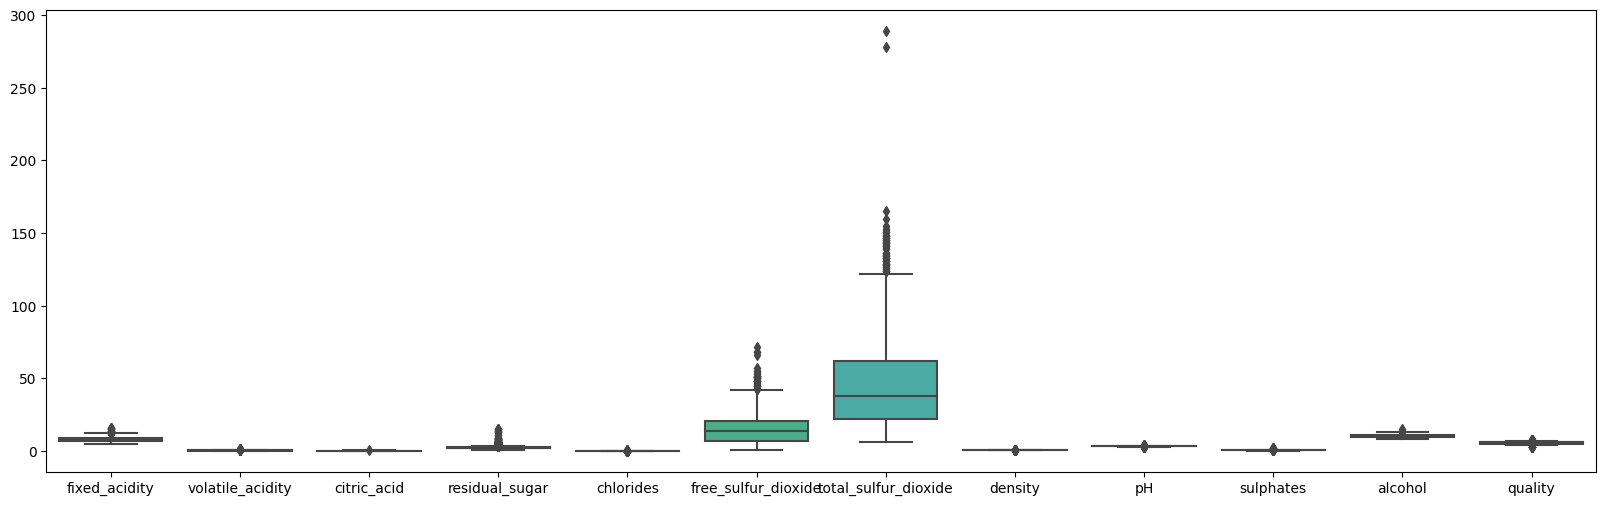

In [21]:
# boxplot

plt.figure(figsize=(20, 6))
sns.boxplot(data=data)
plt.show()

- Outliers in columns like `fixed acidity` and `volatile acidity` indicate the existence of wines with extreme acidity levels, which could be attributed to unique production methods or rare grape varieties.

> A scatter plot that compares the relationships between different pairs of columns: `fixed_acidity` vs `volatile_acidity` and `fixed_acidity` vs `citric_acid`. Scatter plots are valuable visualization tools for exploring the relationships between two numerical variables.

In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['fixed_acidity'], y=data['volatile_acidity'], mode='markers', name='fixed_acidity vs volatile_acidity'))
fig.add_trace(go.Scatter(x=data['fixed_acidity'], y=data['citric_acid'], mode='markers', name='fixed_acidity vs citric_acid'))

fig.update_layout(title='fixed_acidity vs volatile_acidity vs citric_acid vs residual_sugar', xaxis_title='fixed_acidity', yaxis_title='volatile_acidity vs citric_acid vs residual_sugar')
fig.show()

- **Fixed Acidity vs Volatile Acidity:**
  - The scatter plot comparing `fixed_acidity` and `volatile_acidity` reveals a scattered distribution of data points.
  - There doesn't seem to be a strong linear pattern or clear correlation between these two variables.

- **Fixed Acidity vs Citric Acid:**
  - The scatter plot comparing `fixed_acidity` and `citric_acid` also shows a scattered arrangement of data points.
  - Similar to the previous plot, there isn't a distinct linear relationship between these two variables.
  - The data points span various levels of `fixed_acidity` and `citric_acid`, indicating that changes in one variable aren't strongly indicative of changes in the other.

> Defines a function named `outliers` that calculates the lower and upper limits for potential outliers in each numeric column of a DataFrame. The limits are calculated using the Interquartile Range (IQR) method, a common technique for identifying potential outliers. The function returns a dictionary containing the lower and upper limits for each column.

In [23]:
def outliers(df):
    outliers_info = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_limit = q1 - (1.5 * iqr)
            upper_limit = q3 + (1.5 * iqr)
            outliers_info.append({'column_name': col, 'lower_limit': lower_limit, 'upper_limit': upper_limit})
    outliers_df = pd.DataFrame(outliers_info)
    return outliers_df

In [24]:
outliers(data)

,column_name,lower_limit,upper_limit
0,fixed_acidity,3.950000,12.350000
1,volatile_acidity,0.015000,1.015000
2,citric_acid,-0.405000,0.915000
3,residual_sugar,0.850000,3.650000
4,chlorides,0.040000,0.120000
5,free_sulfur_dioxide,-14.000000,42.000000
6,total_sulfur_dioxide,-38.000000,122.000000
7,density,0.992248,1.001187
8,pH,2.925000,3.685000
9,sulphates,0.280000,1.000000


- For instance, in the `fixed_acidity` column, data points with values below 3.95 and above 12.35 are considered potential outliers.
- Similarly, in the `volatile_acidity` column, data points outside the range of 0.015 to 1.015 could be potential outliers.
- The presence of negative lower limits for certain columns like `free_sulfur_dioxide` and `total_sulfur_dioxide` might need more exploration. As, Negative values in these cases could suggest data entry errors or require domain expertise to determine their validity.


> Identifies and records the locations of potential outliers in each numeric column of a DataFrame. The outliers are detected using the Interquartile Range (IQR) method, which allows us to identify data points significantly deviating from the main distribution. The outliers are then recorded in a dictionary, which is returned by the function. The function also prints the number of outliers found in each column.

In [25]:
def find_all_outliers(df):
    all_outliers = pd.DataFrame(columns=['column_name', 'outlier_row_index'])
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_limit = q1 - (1.5 * iqr)
            upper_limit = q3 + (1.5 * iqr)
            
            column_outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
            column_outliers['column_name'] = col
            column_outliers['outlier_row_index'] = column_outliers.index
            
            all_outliers = pd.concat([all_outliers, column_outliers], ignore_index=True)
    
    return all_outliers

In [26]:
find_all_outliers(data)

,column_name,outlier_row_index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,fixed_acidity,205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.80,7.0
1,fixed_acidity,206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.80,7.0
2,fixed_acidity,243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.20,7.0
3,fixed_acidity,244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.20,7.0
4,fixed_acidity,264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.90,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,quality,1449,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.30,8.0
597,quality,1469,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3.0
598,quality,1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3.0
599,quality,1505,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3.0


- Outliers in columns like `fixed_acidity`, `volatile_acidity`, and `density` represent instances where wine attributes significantly differ from the majority.
**Techniques to Treat Outliers:**

1. **Removal or Adjustment**
2. **Binning:** Binning involves grouping similar values together to reduce the impact of outliers.
3. **Imputation:** Imputation involves replacing outliers with another value, such as the mean, median, or mode, or by randomly selecting a value from the same column.

In [27]:
data2 = data.copy()

> The purpose of this code is to replace the identified outliers in each column with the respective column's median value. This technique can preserve the central tendency of the data.

In [28]:
# replacing outliers with median values

def replace_outliers_with_median(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    median_value = df.median()
    return np.where((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)), median_value, df)

columns = data2.columns
for column in columns:
    data2[column] = replace_outliers_with_median(data2[column])

In [29]:
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [30]:
data2

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


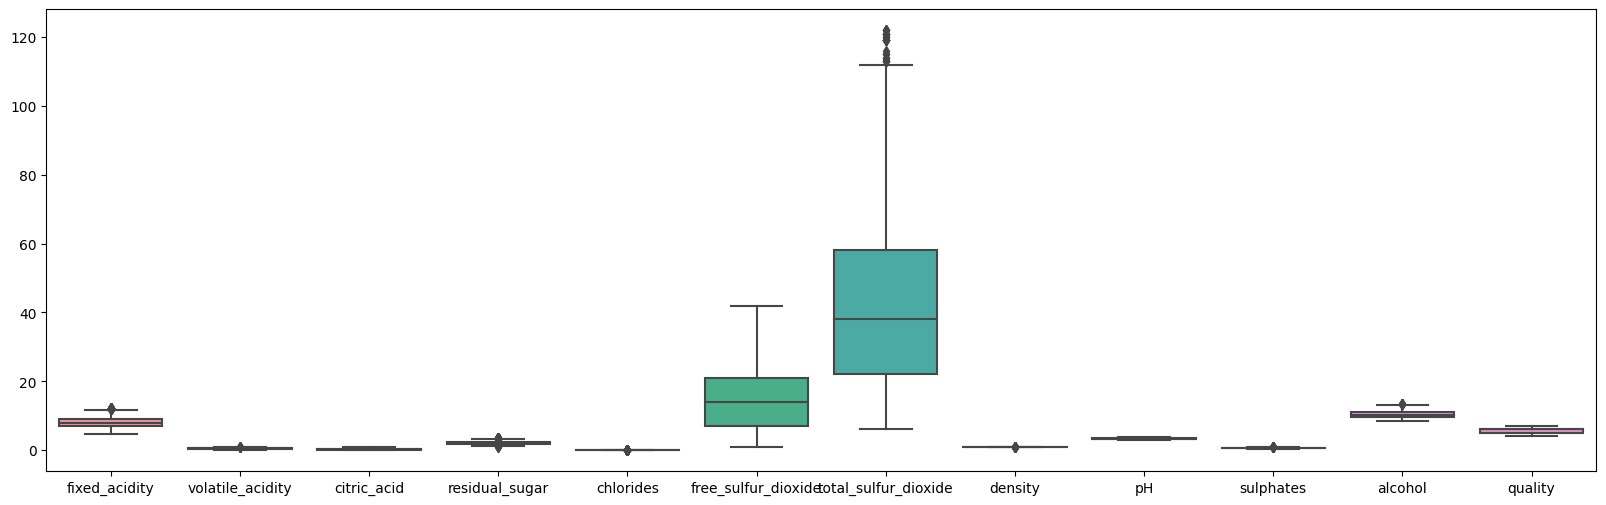

In [31]:
# boxplot

plt.figure(figsize=(20, 6))
sns.boxplot(data=data2)
plt.show()

In [32]:
data2.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.00000,1599.000000,1599.00000
mean,8.154534,0.520547,0.270513,2.181801,0.078773,15.163852,42.825516,0.996735,3.308799,0.63581,10.392798,5.63227
std,1.490883,0.165588,0.193945,0.426845,0.014335,9.140986,26.757870,0.001643,0.138951,0.11875,1.017398,0.74030
min,4.600000,0.120000,0.000000,0.900000,0.041000,1.000000,6.000000,0.992350,2.930000,0.33000,8.400000,4.00000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995680,3.210000,0.55000,9.500000,5.00000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.62000,10.200000,6.00000
75%,9.000000,0.630000,0.420000,2.400000,0.086000,21.000000,58.000000,0.997800,3.400000,0.71000,11.000000,6.00000
max,12.300000,1.010000,0.790000,3.650000,0.119000,42.000000,122.000000,1.001000,3.680000,0.99000,13.500000,7.00000


In [33]:
boxplot_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

for cols in boxplot_cols:
    plt.figure(figsize=(8,8))
    fig5 = px.box(data2,y=cols)
    fig5.show()

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

- **Fixed Acidity:**
  - The box plot for `fixed acidity` initially displayed outliers above the upper whisker, indicating wines with unusually high fixed acidity values.
  - After replacing these outliers with median values, the distribution of `fixed acidity` has become more compact.
  - The median replacement has led to a more balanced representation of fixed acidity across the dataset.

- **Volatile Acidity:**
  - The box plot for `volatile acidity` originally showed a couple of data points above the upper whisker, indicating potential outliers with elevated volatile acidity values.
  - Replacing these outliers with medians has resulted in a narrower range and less variability in volatile acidity values.
  - The transformation has brought the distribution of volatile acidity closer to the central tendency.

- **Density:**
  - In the box plot for `density`, numerous outliers were positioned below the lower whisker, indicating wines with lower density values.
  - After replacing these outliers with medians, the density distribution has become less skewed and more centered around the median value.
  - The outliers impact on the density attribute has been significantly reduced.

**Implications of Outlier Reduction:**

1. **Stability in Summary Statistics:**
2. **Improved Normality Assumption:**
   - In some analyses, assuming a normal distribution of data is important. Outlier reduction can contribute to a closer approximation of normality.


> Feature selection process using correlation analysis

In [34]:
# Feature Selection
correlation_matrix = data.corr()
target_variable = 'quality'
correlation_with_target = correlation_matrix[target_variable].abs().sort_values(ascending=False)
k = 4  # Number of top features to select
selected_features = correlation_with_target[1:k+1].index.tolist()
data_selected = data[selected_features + [target_variable]]
print("Selected Features:")
print(selected_features)

Selected Features:
['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid']


- The key factors are:-
    - Alcohol, Sulphates, and Volatile Acidity.
- Prioritize Alcohol, Sulphates, and Volatile Acidity as they significantly influence wine quality.<br><br>
**Observations on Feature Selection:**

- The selected features represent attributes that exhibit the highest correlations with the target variable (`quality` in this case).
- Feature selection based on correlation aims to capture attributes that potentially contribute significantly to predicting or explaining the target variable.
- The selected features are also highly correlated with each other, which is a potential issue for some machine learning algorithms.

**The feature selection process based on correlation has identified a set of attributes that exhibit strong correlations with the target variable (`quality` in this case). The following features have been selected:**

- 'alcohol'
- 'volatile_acidity'
- 'sulphates'
- 'citric_acid'